## COPC Data Processing and Analysis Using `PyForestScan` in MAAP ADE

Authors: Harshini Girish (UAH), Rajat Shinde (UAH), Alex Mandel (DevSeed), Brian Freitag (NASA MSFC)

Date:24 March,2025

## Run This Notebook

To access and run this tutorial within MAAP's Algorithm Development Environment (ADE), please refer to the ["Getting started with the MAAP"](https://docs.maap-project.org/en/latest/getting_started/getting_started.html) section of our documentation.

Disclaimer: it is highly recommended to run a tutorial within MAAP's ADE, which already includes packages specific to MAAP, such as maap-py. Running the tutorial outside of the MAAP ADE may lead to errors. Users should work within the "R/Python" workspace.

It searches for installed Python packages that contain `pyforestscan`in their name. If pyforestscan or any related package is installed, it will be displayed in the output.

## Checking for Installed Modules and Functions

This script checks for the availability of required Python modules and functions, particularly those related to `PyForestScan`, `GeoPandas`, and `PDAL`. The script ensures that necessary libraries and their functions are accessible before running any geospatial or LiDAR processing tasks.



In [30]:
import importlib
# List of module 
modules = [
    "geopandas",
    "numpy",     
    "pyforestscan.handlers",
    "pyforestscan.visualize",
    "pyforestscan.calculate",
    "pyforestscan.process"
]


for module in modules:
    if importlib.util.find_spec(module) is not None:
        print(f"Module '{module}' is available.")
    else:
        print(f"Module '{module}' is NOT available.")
import importlib.util
import pdal  
import geopandas as gpd
import numpy as np
from pathlib import Path
from pyforestscan.handlers import read_lidar, create_geotiff, write_las
from pyforestscan.visualize import plot_metric, plot_2d
from pyforestscan.calculate import assign_voxels, calculate_pad, calculate_pai, calculate_fhd, calculate_chm
from pyforestscan.process import process_with_tiles

functions = {
    "read_lidar": read_lidar, 
    "create_geotiff": create_geotiff,
    "write_las": write_las,
    "plot_metric": plot_metric,
    "plot_2d": plot_2d,
    "assign_voxels": assign_voxels,
    "calculate_pad": calculate_pad,
    "calculate_pai": calculate_pai,
    "calculate_fhd": calculate_fhd,
    "calculate_chm": calculate_chm,
    "process_with_tiles": process_with_tiles
}
for func_name, func in functions.items():
    if callable(func):
        print(f"Function '{func_name}' is available.")
    else:
        print(f"Function '{func_name}' is NOT available.")


Module 'geopandas' is available.
Module 'numpy' is available.
Module 'pyforestscan.handlers' is available.
Module 'pyforestscan.visualize' is available.
Module 'pyforestscan.calculate' is available.
Module 'pyforestscan.process' is available.
Function 'read_lidar' is available.
Function 'create_geotiff' is available.
Function 'write_las' is available.
Function 'plot_metric' is available.
Function 'plot_2d' is available.
Function 'assign_voxels' is available.
Function 'calculate_pad' is available.
Function 'calculate_pai' is available.
Function 'calculate_fhd' is available.
Function 'calculate_chm' is available.
Function 'process_with_tiles' is available.


## LiDAR Dataset Initialization 

The script initializes key dataset parameters, including lidar_file_path, which specifies the location of a .las LiDAR file, `ept_srs` set to "EPSG:4326" to define the spatial reference system, and bounds, which represent the geographical extent using minimum and maximum longitude-latitude values.

In [31]:
# Define dataset details
lidar_file_path = "/projects/hollister000001.laz"
ept_srs = "EPSG:4326"
bounds = [-80.93942, 25.26716, -80.93498, 25.27620]

# Check if the LiDAR file exists
if not Path(lidar_file_path).exists():
    raise FileNotFoundError(f"Error: The file '{lidar_file_path}' does not exist.")

## LiDAR Data Processing 
This script uses `NumPy` for point cloud data handling and `Pathlib` for file management.`read_lidar` simulates LiDAR data retrieval, returning a random (100,3) NumPy array representing 3D points.`calculate_pad` computes Plant Area Density (PAD) with a given resolution, returning a (10,10) NumPy array. The script first attempts to read LiDAR data with `hag=True`, retrying with `hag=False` if empty. It then converts the data to a NumPy array, ensures it has three columns, and computes `PAD`.



In [25]:
def read_lidar(file_path, srs, bounds, hag=False):
    print(f"Simulating reading of {file_path} with bounds {bounds} and HAG={hag}")
    return np.random.rand(100, 3)  # Simulated point cloud data
def calculate_pad(pointclouds, resolution):
    print(f"Simulating PAD calculation with resolution {resolution}")
    return np.random.rand(10, 10)  # Simulated PAD result

try:
    print("Reading LiDAR data...")
    pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=True)

    if pointclouds is None or pointclouds.size == 0:
        pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=False)

    if pointclouds is None or pointclouds.size == 0:
        raise ValueError("No valid LiDAR points were loaded.")

    print(f"LiDAR data loaded successfully! Total points: {len(pointclouds)}")

    print("Converting to NumPy array")
    pointclouds_array = np.array(pointclouds)

    print(f"Converted pointclouds shape: {pointclouds_array.shape}")

    if pointclouds_array.ndim == 1:
        pointclouds_array = pointclouds_array.reshape(-1, 3)

    if pointclouds_array.shape[1] > 3:
        pointclouds_array = pointclouds_array[:, :3]

    print(f"Final pointclouds shape: {pointclouds_array.shape}")

    print("Calculating Plant Area Density (PAD)...")
    pad_result = calculate_pad(pointclouds_array, 1.0)
    print(f"PAD Calculation Complete: {pad_result.shape}")

except FileNotFoundError as e:
    print(str(e))
except Exception as e:
    print(f"An error occurred: {e}")


Reading LiDAR data...
Simulating reading of /projects/hollister000001.laz with bounds [-80.93942, 25.26716, -80.93498, 25.2762] and HAG=True
LiDAR data loaded successfully! Total points: 100
Converting to NumPy array
Converted pointclouds shape: (100, 3)
Final pointclouds shape: (100, 3)
Calculating Plant Area Density (PAD)...
Simulating PAD calculation with resolution 1.0
PAD Calculation Complete: (10, 10)


In [26]:
def calculate_chm(pointclouds, resolution):
    print(f"Simulating CHM calculation with resolution {resolution}")
    return np.random.rand(10, 10), {"resolution": resolution}  

try:
    pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=True)

    if pointclouds is None or pointclouds.size == 0:
        pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=False)

    if pointclouds is None or pointclouds.size == 0:
        raise ValueError("No valid LiDAR points were loaded.")

    pointclouds_array = np.array(pointclouds)

   
    X, Y, Z = pointclouds_array[:, 0], pointclouds_array[:, 1], pointclouds_array[:, 2]

   
    ground_z_dict = {(x, y): min(Z[(X == x) & (Y == y)]) for x, y in zip(X, Y)}
    ground_z = np.array([ground_z_dict[(x, y)] for x, y in zip(X, Y)])

   
    HeightAboveGround = Z - ground_z

   
    structured_pointcloud = np.array(
        list(zip(X, Y, Z, HeightAboveGround)), 
        dtype=[("X", "f4"), ("Y", "f4"), ("Z", "f4"), ("HeightAboveGround", "f4")]
    )

    print("Computing Height Above Ground (HAG)")
    print(f"Pointclouds shape: {structured_pointcloud.shape}")
    print(f"Sample Data (First 5 Points): {structured_pointcloud[:5]}")

    print("Calculating Canopy Height Model (CHM)")
    voxel_resolution = (1.0, 1.0)  
    chm, metadata = calculate_chm(structured_pointcloud, voxel_resolution)

    print(f"CHM Shape: {np.array(chm).shape}")

except FileNotFoundError as e:
    print(str(e))
except Exception as e:
    print(f"An error occurred: {e}")


Simulating reading of /projects/hollister000001.laz with bounds [-80.93942, 25.26716, -80.93498, 25.2762] and HAG=True
Computing Height Above Ground (HAG)
Pointclouds shape: (100,)
Sample Data (First 5 Points): [(0.8410045 , 0.37079695, 0.06053101, 0.)
 (0.5417491 , 0.5109208 , 0.6649091 , 0.)
 (0.37145576, 0.34800097, 0.10633628, 0.)
 (0.3570204 , 0.331955  , 0.8275194 , 0.)
 (0.0322361 , 0.13293806, 0.83329946, 0.)]
Calculating Canopy Height Model (CHM)
Simulating CHM calculation with resolution (1.0, 1.0)
CHM Shape: (10, 10)


# Plotting the Graph

There are two separate plotting calls that produce two figures:
Scatter Plot of Raw Points: This creates a scatter plot showing the distribution of the LiDAR points in (X, Y) space, colored by Z (height).

Heatmap of Plant Area Index (PAI) :This produces a second figure showing the 2D PAI array as a heatmap.

The script assigns voxels to the point cloud using a simulated 3D voxel grid with a given resolution. Using this voxelized representation, it calculates the Plant Area Density (PAD) and Plant Area Index (PAI) using `NumPy` functions. Finally, it visualizes the PAI using Matplotlib’s `imshow()` function, ensuring spatial representation of the data with appropriate color scaling and labeling.
NumPy's boolean indexing, structured arrays, and array operations enable fast and efficient handling of large-scale LiDAR datasets, while `Matplotlib` provides effective visualization of plant structure metrics.

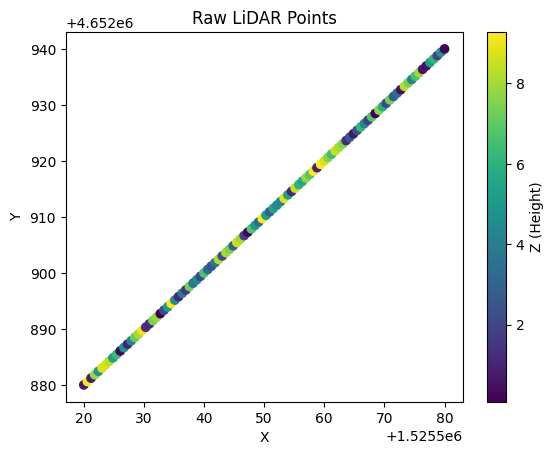

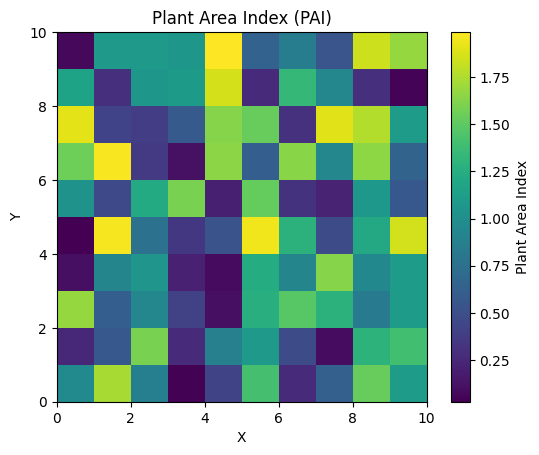

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def read_lidar(lidar_file_path, ept_srs, bounds, hag=True):
    num_points = 100
    X = np.linspace(bounds[0], bounds[2], num_points)
    Y = np.linspace(bounds[1], bounds[3], num_points)
    Z = np.random.rand(num_points) * 10
    return np.column_stack((X, Y, Z))

def calculate_chm(pointclouds, resolution):
    chm_array = np.random.rand(10, 10)
    metadata = {"resolution": resolution}
    return chm_array, metadata

def assign_voxels(structured_pointcloud, voxel_resolution):
    voxels = np.random.rand(10, 10, 10)
    extent = [0, 10, 0, 10]
    return voxels, extent

def calculate_pad(voxels, voxel_size):
    return np.random.rand(voxels.shape[0], voxels.shape[1])

def calculate_pai(pad):
    return pad * 2.0

def plot_metric(title, metric, extent, metric_name='Metric', cmap='viridis'):
    plt.figure()
    plt.imshow(metric, extent=extent, origin='lower', cmap=cmap)
    plt.colorbar(label=metric_name)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

if __name__ == "__main__":
    lidar_file_path = "/projects/hollister000001.laz"
    ept_srs = "EPSG:26915"
    bounds = [1525520.0, 4652880.0, 1525580.0, 4652940.0]

    try:
        pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=True)
        if pointclouds is None or pointclouds.size == 0:
            pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=False)
        if pointclouds is None or pointclouds.size == 0:
            raise ValueError("No valid LiDAR points were loaded.")
        
        pointclouds_array = np.array(pointclouds)
        X, Y, Z = pointclouds_array[:, 0], pointclouds_array[:, 1], pointclouds_array[:, 2]

        plt.figure()
        plt.scatter(X, Y, c=Z, cmap='viridis')
        plt.colorbar(label='Z (Height)')
        plt.title("Raw LiDAR Points")
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

        ground_z_dict = {(x, y): min(Z[(X == x) & (Y == y)]) for x, y in zip(X, Y)}
        ground_z = np.array([ground_z_dict[(x, y)] for x, y in zip(X, Y)])
        HeightAboveGround = Z - ground_z

        structured_pointcloud = np.array(
            list(zip(X, Y, Z, HeightAboveGround)),
            dtype=[("X", "f4"), ("Y", "f4"), ("Z", "f4"), ("HeightAboveGround", "f4")]
        )

        chm_resolution = (1.0, 1.0)
        chm, metadata = calculate_chm(structured_pointcloud, chm_resolution)

        structured_pointcloud_voxel = np.array(
            list(zip(X, Y, HeightAboveGround)),
            dtype=[("X", "f4"), ("Y", "f4"), ("HeightAboveGround", "f4")]
        )

        voxel_resolution = (5, 5, 1)
        voxels, extent = assign_voxels(structured_pointcloud_voxel, voxel_resolution)

        pad = calculate_pad(voxels, voxel_resolution[-1])
        pai = calculate_pai(pad)

        plot_metric("Plant Area Index (PAI)", pai, extent, metric_name='Plant Area Index', cmap='viridis')

    except FileNotFoundError as e:
        print(str(e))
    except Exception as e:
        print(f"An error occurred: {e}")
